In [964]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para graficar fechas
import seaborn as sns
import math # Para logaritmos
import os # Para cambiar directorios para los que trabajen de forma local en sus computadoras
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter # Filtro HP
from datetime import datetime
from sklearn.model_selection import train_test_split
#pd.set_option('display.float_format', '{:.2f}'.format)



Importamos los datos

In [965]:
df = pd.read_excel('deflactacion_corrientes.xlsx')
df = df.drop('Unnamed: 0',axis=1)
df.set_index('fecha',inplace=True)

df

,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros
fecha,,,,,,,,,,,,,,
2017-01-01,5,18,414425.89,55223.97,93280.93,19161.33,31799.71,52424.65,16475.95,13889.58,53520.86,11313.45,27207.56,39662.07
2017-02-01,5,18,393554.10,52277.27,95111.70,18678.89,31539.13,51979.76,16524.55,12775.21,49428.09,10054.45,21156.32,33553.14
2017-03-01,5,18,400771.34,52853.43,101066.13,19780.98,32512.80,52554.65,17230.40,13257.76,51250.27,9989.44,21353.43,30834.41
2017-04-01,5,18,411524.24,50280.32,110553.62,21049.55,31650.97,54256.12,15848.45,13309.97,51006.93,12887.98,23611.24,29449.35
2017-05-01,5,18,390927.50,42314.30,100641.90,19761.43,29896.17,49624.11,14179.88,12517.99,48910.21,14040.95,30447.03,29814.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5,18,362776.48,73596.57,66509.41,12378.02,24954.74,39250.82,10924.85,6873.98,40024.13,10900.05,17093.07,33760.41
2024-01-01,5,18,282017.92,46319.15,52891.97,10320.21,23494.18,28671.61,10017.84,5261.15,34081.62,6414.87,12361.93,24635.88
2024-02-01,5,18,259887.04,40663.27,51263.34,9717.90,20869.63,28810.39,9996.01,4865.16,30093.04,4932.40,11456.42,22770.22


In [966]:
columna_objetivo = 'total_facturacion'

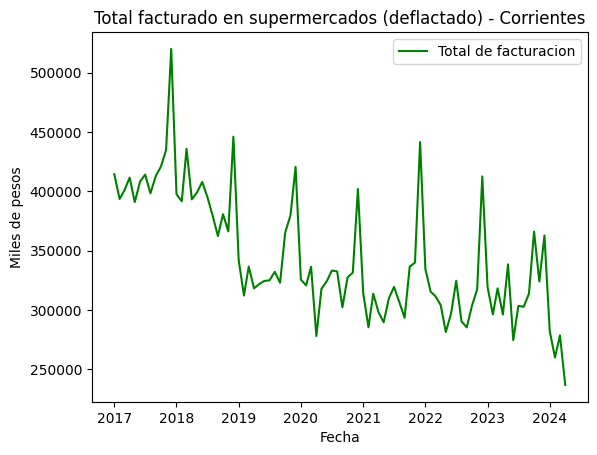

In [967]:
plt.plot(df[columna_objetivo],label='Total de facturacion', color = "green")
plt.title('Total facturado en supermercados (deflactado) - Corrientes')
plt.xlabel('Fecha')
plt.ylabel('Miles de pesos')
plt.legend()
plt.show()


Generamos una serie secuencial para añadir una tendencia, es un tipo de indice

In [968]:
df['tendencia'] = np.arange(1,len(df)+1)

Creamos un modelo lineal teniendo en cuenta solo esta variable "tendencia"

In [969]:
X = df['tendencia']
X = sm.add_constant(X)

Y = df[columna_objetivo]
reg_ten1 = sm.OLS(Y,X).fit()
print(reg_ten1.summary())
predicciones = reg_ten1.predict(X)

                            OLS Regression Results                            
Dep. Variable:      total_facturacion   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     79.68
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           6.95e-14
Time:                        16:15:38   Log-Likelihood:                -1050.9
No. Observations:                  88   AIC:                             2106.
Df Residuals:                      86   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.071e+05   8086.169     50.340      0.0

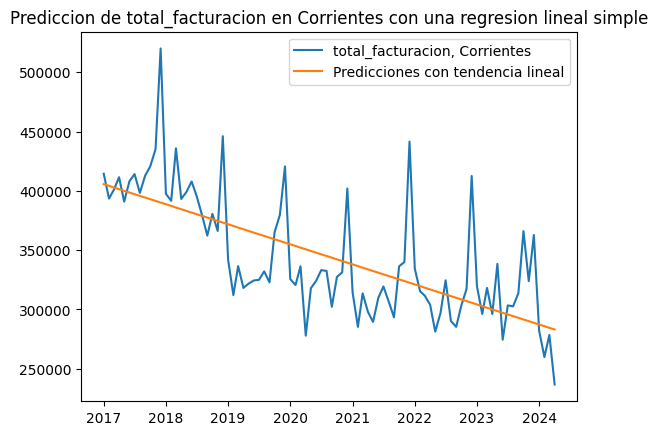

In [970]:
plt.plot(df[columna_objetivo],label = f"{columna_objetivo}, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal")
plt.title(f"Prediccion de {columna_objetivo} en Corrientes con una regresion lineal simple")
plt.legend()
plt.show()

Probando lo mismo, pero con una tendencia cuadratica

In [971]:
df['tend_cuadratica'] = df['tendencia'] ** 2

In [972]:
X = df[['tendencia','tend_cuadratica']]
X = sm.add_constant(X)

Y = df[columna_objetivo]

#AJustamos el modelo y lo probamos
reg_ten1 = sm.OLS(Y,X).fit()
print(reg_ten1.summary())
predicciones = reg_ten1.predict(X)

                            OLS Regression Results                            
Dep. Variable:      total_facturacion   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     47.55
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.39e-14
Time:                        16:15:38   Log-Likelihood:                -1046.7
No. Observations:                  88   AIC:                             2099.
Df Residuals:                      85   BIC:                             2107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.33e+05   1.18e+04     

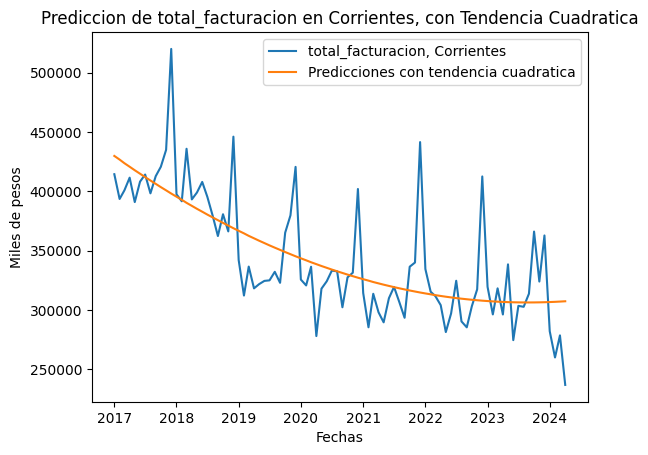

In [973]:
plt.plot(df[columna_objetivo],label = f"{columna_objetivo}, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia cuadratica")
plt.title(f"Prediccion de {columna_objetivo} en Corrientes, con Tendencia Cuadratica")
plt.ylabel("Miles de pesos")
plt.xlabel('Fechas')
plt.legend()
plt.show()

<h3> Capturamos la estacionalidad </h3>
<p> Buscamos capturar la estacionalidad del conjunto de datos usando variables binarias para marcar mejores los meses </p>
<p> Para ello creamos una dummie binaria que marque los meses </p>

In [974]:
df['mes'] = df.index.month #--> 1. Tomamos los meses

#2. Lo que hace esto es: 
# Genera la dummie, tomando el DF como conjunto de datos, la columna 'meses' para generar la dummie
# y eliminamos el primer elemento para evitar la multicolinealidad. Por ultimo declaramos que sea numerica
# la variable binaria (trabajamos con 0 y 1).
df = pd.get_dummies(df,columns=['mes'], drop_first=True, dtype=int)
df

,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
fecha,,,,,,,,,,,,,,,,,,,,,
2017-01-01,5,18,414425.89,55223.97,93280.93,19161.33,31799.71,52424.65,16475.95,13889.58,...,0,0,0,0,0,0,0,0,0,0
2017-02-01,5,18,393554.10,52277.27,95111.70,18678.89,31539.13,51979.76,16524.55,12775.21,...,0,0,0,0,0,0,0,0,0,0
2017-03-01,5,18,400771.34,52853.43,101066.13,19780.98,32512.80,52554.65,17230.40,13257.76,...,1,0,0,0,0,0,0,0,0,0
2017-04-01,5,18,411524.24,50280.32,110553.62,21049.55,31650.97,54256.12,15848.45,13309.97,...,0,1,0,0,0,0,0,0,0,0
2017-05-01,5,18,390927.50,42314.30,100641.90,19761.43,29896.17,49624.11,14179.88,12517.99,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5,18,362776.48,73596.57,66509.41,12378.02,24954.74,39250.82,10924.85,6873.98,...,0,0,0,0,0,0,0,0,0,1
2024-01-01,5,18,282017.92,46319.15,52891.97,10320.21,23494.18,28671.61,10017.84,5261.15,...,0,0,0,0,0,0,0,0,0,0
2024-02-01,5,18,259887.04,40663.27,51263.34,9717.90,20869.63,28810.39,9996.01,4865.16,...,0,0,0,0,0,0,0,0,0,0


In [975]:
#Con tendencia: p valor = 0.088
#Con tend. cuadratica: p valor = 0.027

X = df[['tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df[columna_objetivo]

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     25.19
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.50e-21
Time:                        16:15:38   Log-Likelihood:                -1008.7
No. Observations:                  88   AIC:                             2043.
Df Residuals:                      75   BIC:                             2076.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.041e+05   9897.106     40.832      0.000    3.84e+05    4.24e+05
tendencia  -1462.9561    104.880    -13.949      0.000   -1671.887   -1254.025
mes_2      -1.792e+04   1.25e+04     -1.438      0.155   -4.27e+04    6904.270
mes_3       3138.0256   1.25e+04      0.252      0.802   -2.17e+04     2.8e+04
mes_4      -1.986e+04   1.25e+04     -1.594      0.115   -4.47e+04    4964.948
mes_5      -1.003e+04   1.29e+04     -0.778      0.439   -3.57e+04    1.57e+04
mes_6      -7518.8384   1.29e+04     -0.583      0.562   -3.32e+04    1.82e+04
mes_7       3781.6042   1.29e+04      0.293      0.770   -2.19e+04    2.95e+04
mes_8      -5173.5587   1.29e+04     -0.401      0.689   -3.09e+04    2.05e+04
mes_9      -1.079e+04   1.29e+04     -0.837      0.405   -3.65e+04    1.49e+04
mes_10      2.027e+04   1.29e+04      1.571      0.120   -5429.661     4.6e+04
mes_11      2.085e+04   1.29e+04      1.616      0.110   -4857.784    4.66e+04
mes_12      9.548e+04   1.29e+04      7.397      0.000    6.98e+04    1.21e+05
==============================================================================
Omnibus:                        3.195   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.135
Skew:                           0.415   Prob(JB):                        0.209
Kurtosis:                       2.593   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [976]:
#Generamos predicciones
predicciones = reg_tend_estac.predict(X)

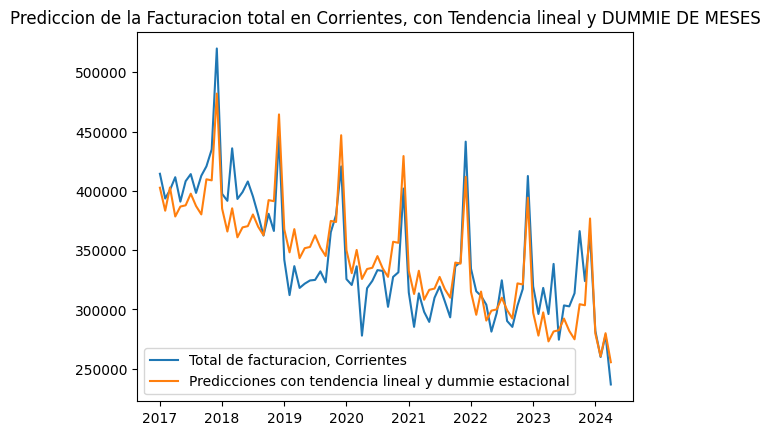

In [977]:
plt.plot(df[columna_objetivo],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia lineal y DUMMIE DE MESES")
plt.legend()
plt.show()

<h3> Inclusion de resagos (lags) </h3>


In [978]:
df['ventas_lag'] = df[columna_objetivo].shift(1)

In [979]:
X = df.dropna(subset=['ventas_lag'])[['ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df.dropna(subset=['ventas_lag'])[columna_objetivo]

reg_tend_estac_lag = sm.OLS(y,X).fit()
predicciones = reg_tend_estac_lag.predict(X)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     48.66
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.32e-30
Time:                        16:15:38   Log-Likelihood:                -968.39
No. Observations:                  87   AIC:                             1965.
Df Residuals:                      73   BIC:                             1999.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.126e+04   4.27e+04      1.200      0.234   -3.38e+04    1.36e+05
ventas_lag     0.7010      0.084      8.353      0.000       0.534       0.868
tendencia   -438.6550    143.890     -3.049      0.003    -725.427    -151.883
mes_2       5.069e+04   1.23e+04      4.121      0.000    2.62e+04    7.52e+04
mes_3        8.43e+04   1.33e+04      6.326      0.000    5.77e+04    1.11e+05
mes_4       4.654e+04   1.21e+04      3.838      0.000    2.24e+04    7.07e+04
mes_5       7.061e+04   1.35e+04      5.228      0.000    4.37e+04    9.75e+04
mes_6       6.811e+04   1.31e+04      5.203      0.000     4.2e+04    9.42e+04
mes_7       7.765e+04   1.29e+04      5.998      0.000    5.19e+04    1.03e+05
mes_8       6.078e+04   1.23e+04      4.928      0.000    3.62e+04    8.54e+04
mes_9       6.144e+04   1.28e+04      4.795      0.000    3.59e+04     8.7e+04
mes_10      9.644e+04   1.31e+04      7.346      0.000    7.03e+04    1.23e+05
mes_11      7.525e+04   1.15e+04      6.532      0.000    5.23e+04    9.82e+04
mes_12      1.495e+05   1.15e+04     13.006      0.000    1.27e+05    1.72e+05
==============================================================================
Omnibus:                        0.582   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.179
Skew:                          -0.008   Prob(JB):                        0.915
Kurtosis:                       3.221   Cond. No.                     9.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que la inclusion de las ventas con lag reduce en grand medida los p valores, de las variables dummies que representan los meses

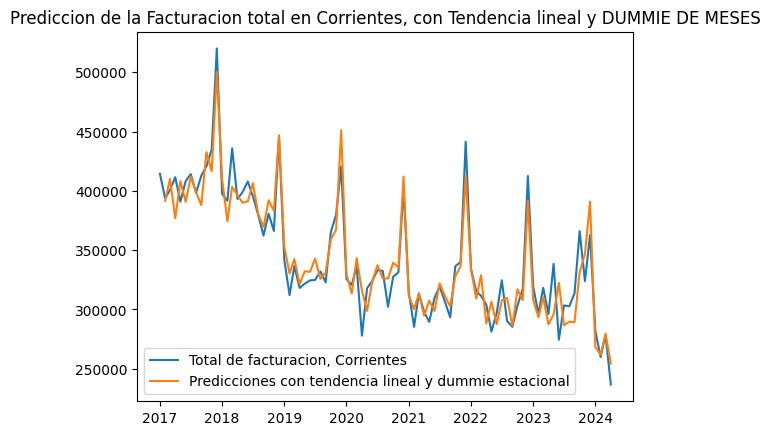

In [980]:
plt.plot(df[columna_objetivo],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia lineal y DUMMIE DE MESES")
plt.legend()
plt.show()

<h1> Influencia del COVID </h1>
<p> Agregamos una binaria para ver como afecto a las ventas el virus COVID. </p>
<p> Consideramos:</p>
<p> Fecha de inicio: 11 de Marzo 2020 - Declara la OMS</p>
<p> Fecha de "fin": Diciembre 2022 - Idea general</p>


In [981]:
df['covid'] = ((df.index >= datetime(2020,3,11)) & (df.index <= datetime(2022,12,30))).astype(int)

Creamos nuestras X e Y para el modelo, y dividimos los datos.

In [982]:
#Tanto para X como y, dejaremos solo aquellas filas cuyos valores de 'venta_lag' no sean nulos
X = df.dropna(subset=['ventas_lag'])[['covid','ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
y = df.dropna(subset=['ventas_lag'])[columna_objetivo]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

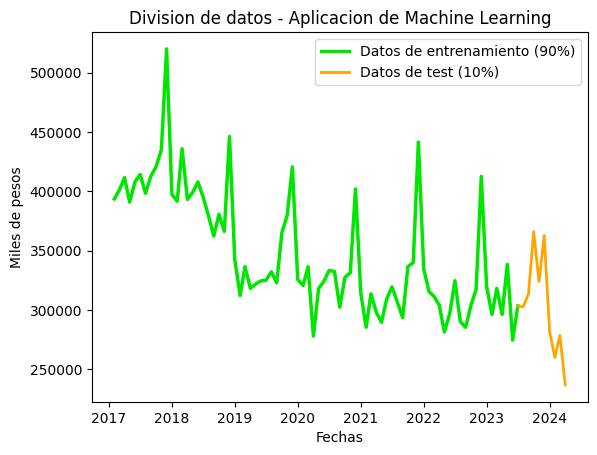

In [983]:
#Sacamos largo para determinar el 90 de los datos
largo = len(y)
porcentage_90 = int(largo*0.9)

plt.title("Division de datos - Aplicacion de Machine Learning")
plt.plot(y[:porcentage_90], label = "Datos de entrenamiento (90%)",color = (0.0, 0.9, 0.0),linewidth = 2.5)
plt.plot(y[porcentage_90 -1:],label = "Datos de test (10%)",color = "orange",linewidth = 2.0)
plt.xlabel('Fechas')
plt.ylabel('Miles de pesos')
plt.legend()
plt.show()

In [984]:
#Ajustamos el modelo que uncluye la variable dummie de covid
reg_tend_estac_lag = sm.OLS(y_train,X_train).fit()
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     41.82
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.78e-26
Time:                        16:15:39   Log-Likelihood:                -864.16
No. Observations:                  78   AIC:                             1758.
Df Residuals:                      63   BIC:                             1794.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.684e+04   4.79e+04      1.186      0.240   -3.89e+04    1.53e+05
covid      -3823.4825   5276.532     -0.725      0.471   -1.44e+04    6720.825
ventas_lag     0.6848      0.094      7.324      0.000       0.498       0.872
tendencia   -426.3047    169.112     -2.521      0.014    -764.247     -88.362
mes_2       5.168e+04   1.34e+04      3.861      0.000    2.49e+04    7.84e+04
mes_3       8.484e+04   1.46e+04      5.825      0.000    5.57e+04    1.14e+05
mes_4       5.031e+04    1.3e+04      3.861      0.000    2.43e+04    7.63e+04
mes_5       7.148e+04   1.44e+04      4.971      0.000    4.27e+04       1e+05
mes_6       6.906e+04   1.39e+04      4.970      0.000    4.13e+04    9.68e+04
mes_7       7.861e+04   1.37e+04      5.724      0.000    5.12e+04    1.06e+05
mes_8       6.017e+04   1.33e+04      4.508      0.000    3.35e+04    8.68e+04
mes_9       5.873e+04    1.4e+04      4.193      0.000    3.07e+04    8.67e+04
mes_10      9.187e+04   1.46e+04      6.304      0.000    6.27e+04    1.21e+05
mes_11      8.062e+04   1.29e+04      6.268      0.000    5.49e+04    1.06e+05
mes_12      1.558e+05   1.24e+04     12.523      0.000    1.31e+05    1.81e+05
==============================================================================
Omnibus:                        3.875   Durbin-Watson:                   2.459
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.515
Skew:                          -0.269   Prob(JB):                        0.172
Kurtosis:                       3.890   Cond. No.                     1.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [985]:
#Realizamos las predicciones con el conjunto de test
predicciones = reg_tend_estac_lag.predict(X_test)

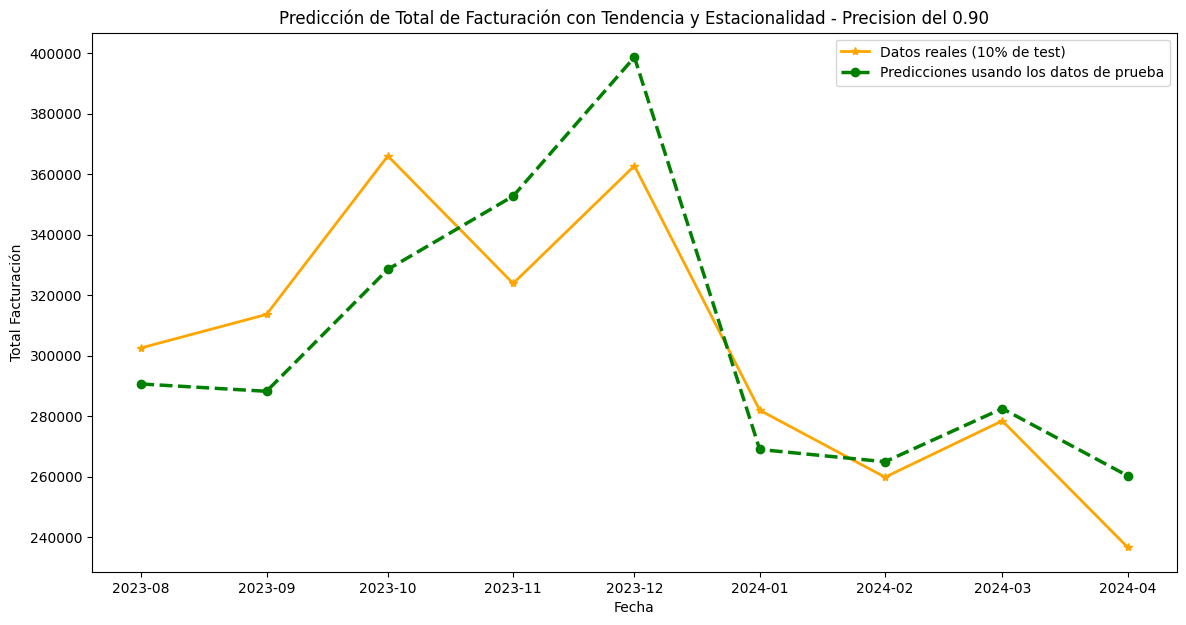

In [986]:
# Graficar los resultados del modelo inicial
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label="Datos reales (10% de test)", color='orange', marker = "*", linewidth = 2.0)
plt.plot(X_test.index, predicciones, label='Predicciones usando los datos de prueba', color='green', linestyle='--',linewidth = 2.5, marker = "o")
plt.title(f'Predicción de Total de Facturación con Tendencia y Estacionalidad - Precision del {reg_tend_estac_lag.rsquared:.2f}')
plt.xlabel('Fecha')
plt.ylabel('Total Facturación')
plt.legend()
plt.show()

<h3> Entrenamiento del modelo usando todos los datos </h3>
Como tal, el modelo hasta el momento es puramente descriptivo, ya que nuestra idea es generar una prediccino a futuro, de forma que predecir un valor que el indec ya presento oficialmente, no es realmente util.

In [987]:
# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train, X_test])
y_train_full = pd.concat([y_train, y_test])

# Reentrenar el modelo de regresión lineal con todos los datos
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit()
print(reg_tend_estac_lag_full.summary())

                            OLS Regression Results                            
Dep. Variable:      total_facturacion   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     44.99
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           7.00e-30
Time:                        16:15:39   Log-Likelihood:                -968.02
No. Observations:                  87   AIC:                             1966.
Df Residuals:                      72   BIC:                             2003.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.437e+04    4.6e+04      1.400      0.1

<h1> PREDICCIONES HASTA DICIEMBRE DEL 2024 </h1>
<hr>
<p>Para esta etapa iremos haciendo una iteraccion por cada mes, de forma que</p>

* Predecimos un valor
* Lo añadimos a los datos de entrenamiento
* Reajustamos el modelo
* Repetimos estos pasos hasta llegar a diciembre


In [988]:
#=============== MAYO ===============#
#Fila para predecir MAYO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 1,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_mayo = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_mayo])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== JUNIO ===============#

#FILA PARA PREDECIR JUNIO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 1,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_junio = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_junio])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== JULIO ===============#

#FILA PARA PREDECIR JULIO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 1,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_julio = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_julio])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== AGOSTO ===============#

#FILA PARA PREDECIR AGOSTO
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 1,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_agosto = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_agosto])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO


#=============== SEPTIEMBRE ===============#


#FILA PARA PREDECIR SEPTIEMBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 1,'mes_10': 0,'mes_11': 0,
    'mes_12': 0}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_septiembre = reg_tend_estac_lag_full.predict(nueva_fila_df)


# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_septiembre])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO


#=============== OCTUBRE ===============#

#FILA PARA PREDECIR OCTUBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 1,'mes_11': 0,
    'mes_12': 0}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_octubre = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_octubre])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO

#=============== NOVIEMBRE ===============#

#FILA PARA PREDECIR NOVIEMBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 1,
    'mes_12': 0}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_noviembre = reg_tend_estac_lag_full.predict(nueva_fila_df)

# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_noviembre])
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit() #--> REAJUSTAMOS EL MODELO


#=============== DICIEMBRE ===============#

#FILA PARA PREDECIR DICIEMBRE
nueva_fila = {
    'const': 1,'covid': 0, 'ventas_lag': y_train_full.values[-1],'tendencia': X_train_full['tendencia'].max() + 1,
    'mes_2': 0,'mes_3': 0,'mes_4': 0,'mes_5': 0,'mes_6': 0,'mes_7': 0,'mes_8': 0,'mes_9': 0,'mes_10': 0,'mes_11': 0,
    'mes_12': 1}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[X_train_full.index[-1] + pd.DateOffset(months=1)])

prediccion_diciembre = reg_tend_estac_lag_full.predict(nueva_fila_df)


# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train_full, nueva_fila_df])
y_train_full = pd.concat([y_train_full, prediccion_diciembre])


            const  covid  ventas_lag  tendencia  mes_2  mes_3  mes_4  mes_5  \
2024-12-01      1      0   292370.24         96      0      0      0      0   

            mes_6  mes_7  mes_8  mes_9  mes_10  mes_11  mes_12  
2024-12-01      0      0      0      0       0       0       1  


Estudiaremos las variaciones de estas predecciones

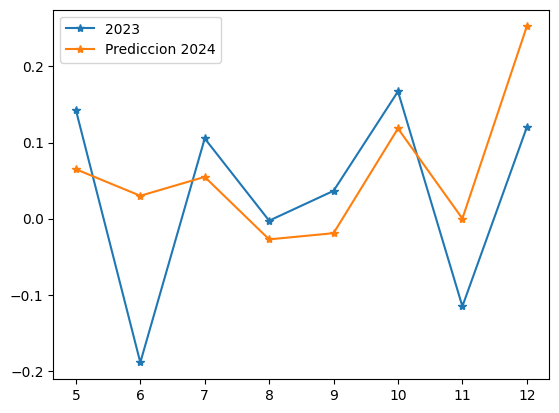

In [1025]:
#plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2017].iloc[-9:].pct_change(),marker = "*",label = "20217")
#plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2018].iloc[-9:].pct_change(),marker = "*",label = "2018")
#plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2019].iloc[-9:].pct_change(),marker = "*",label = "2019")
#plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2020].iloc[-9:].pct_change(),marker = "*",label = "2020")
#plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2021].iloc[-9:].pct_change(),marker = "*",label = "2021")
#plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2022].iloc[-9:].pct_change(),marker = "*",label = "2022")
plt.plot(range(4,13),y_train_full[y_train_full.index.year == 2023].iloc[-9:].pct_change(),marker = "*",label = "2023")
plt.plot(range(4,13),y_train_full.iloc[-9:].pct_change(),marker = "*",label = "Prediccion 2024")
plt.legend()